# Practice 1
**Author: Jorge Vázquez Pérez**

## Table of Contents

1. [Preprocessing](#apartado1)
2. [Develop a classical neural network to predict class of each image](#apartado2)
3. [Regularization](#apartado3)
4. [Results](#apartado4)
5. [Conclusions](#apartado5)

In [1]:
%%capture
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data();

2023-11-27 18:11:01.595642: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-27 18:11:01.596756: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 18:11:01.619426: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 18:11:01.619804: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 18:11:01.993466: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

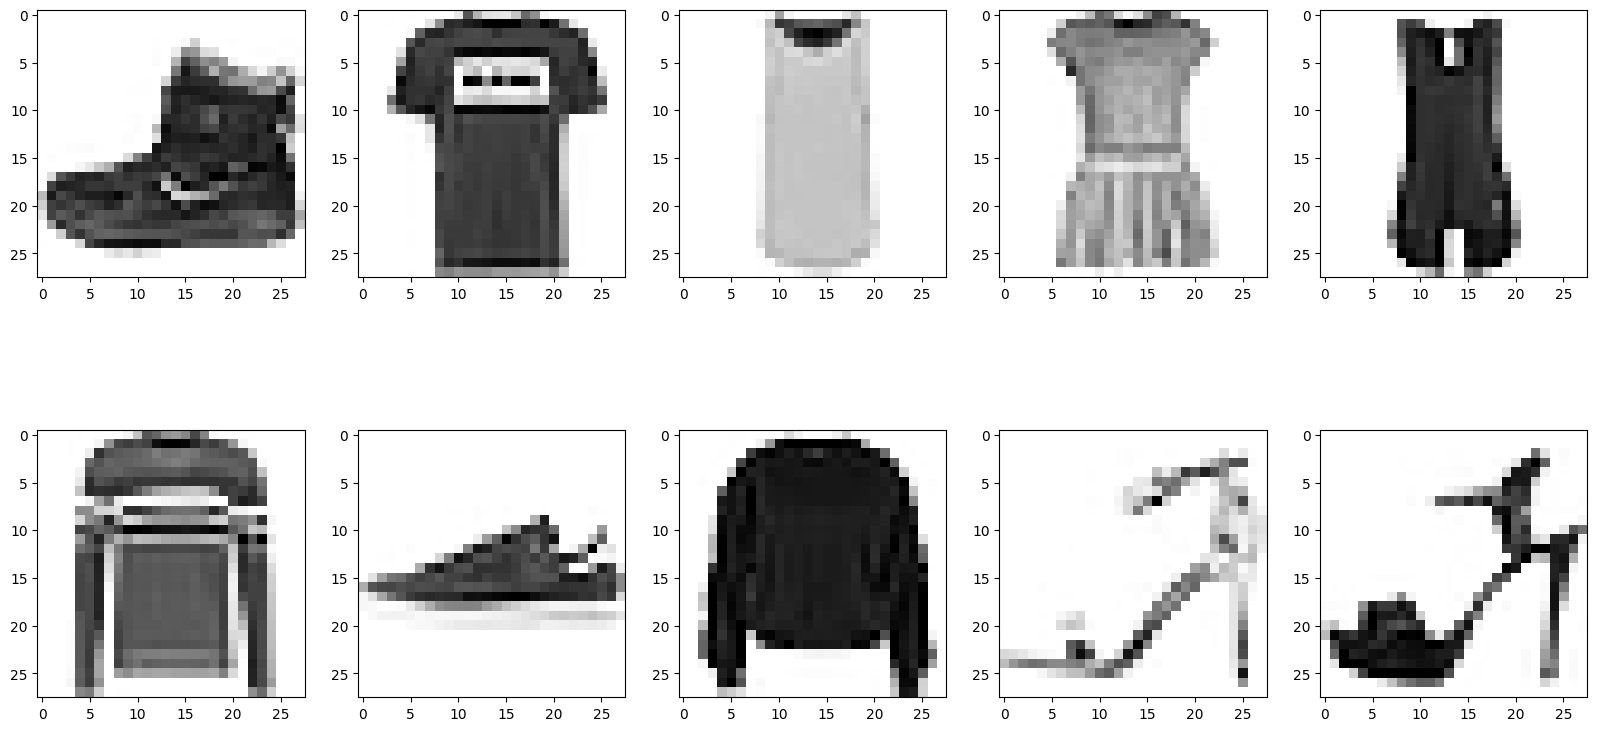

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'Greys'
plt.figure(figsize=(20,10))
ncols = 5
nrows = 2
for i, image in enumerate(x_train[:nrows*ncols]):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(image)

In [3]:
print("The tags for the previous images are:")
for i in range(nrows):
    print(y_train[i*ncols:(i+1)*ncols])

The tags for the previous images are:
[9 0 0 3 0]
[2 7 2 5 5]


## Preprocessing <a class="anchor" id="apartado1"></a>

In [4]:
print("Shape of image train set is: ", x_train.shape)
print("Shape of image test set is: ", x_test.shape)

Shape of image train set is:  (60000, 28, 28)
Shape of image test set is:  (10000, 28, 28)


In [5]:
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))

print("Shape of image train set is: ", x_train.shape)
print("Shape of image test set is: ", x_test.shape)

Shape of image train set is:  (60000, 784)
Shape of image test set is:  (10000, 784)


In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
x_val = x_train[:10000] # Copy of x_train from the begining (0) to 9999
partial_x_train = x_train[10000:] # Copy of x_train from 10000 to the end
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Develop a classical neural network to predict class of each image <a class="anchor" id="apartado2"></a>

### Structural hyperparameters

In [ ]:
def compare_models(histories):
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    for i, history in enumerate(histories):
        history_dict = history.history
        epochs = range(1, len(history_dict['loss']) + 1)
        axs[i].plot(epochs, history_dict['loss'], 'b-o', label='Training loss')
        axs[i].plot(epochs, history_dict['val_loss'], 'r-o', label='Validation loss')
        axs[i].set_title('Model {}'.format(i+1))
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel('Loss')
        axs[i].legend()
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the model
model1 = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Define the model
model2 = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Define the model
model3 = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

for model in [model1, model2, model3]:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history1 = model1.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val), verbose=0)
history2 = model2.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val), verbose=0)
history3 = model3.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val), verbose=0)

compare_models([history1, history2, history3])

In [ ]:
# Define the model
model1_ = Sequential([
    Flatten(input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Define the model
model2_ = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Define the model
model3_ = Sequential([
    Flatten(input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

for model in [model1_, model2_, model3_]:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history1_ = model1_.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val), verbose=0)
history2_ = model2_.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val), verbose=0)
history3_ = model3_.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val), verbose=0)

compare_models([history1_, history2_, history3_])

In [ ]:
# List of activation functions to compare.
activation_functions = ['relu', 'sigmoid', 'tanh', 'softmax']

# Dictionary to store results.
results = {}

for activation in activation_functions:
    # Create a Sequential model.
    model = Sequential([
        Flatten(input_shape=(784,)),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model.
    print(f"\nTraining model with {activation} activation...", end=" ")
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, verbose=0)
    print(f"Done.")
    
    # Evaluate the model.
    score = model.evaluate(x_test, y_test, verbose=0)
    results[activation] = score[1]  # store the accuracy

# Print the results.
print(f"------ Activation results --------\n\n")
for activation, accuracy in results.items():
    print(f"Accuracy with {activation} activation: {accuracy:.4f}")

### Learning parameters

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras_tuner import HyperModel
from keras_tuner.tuners import GridSearch

class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential([
            Flatten(input_shape=(784,)),
            Dense(64, activation='relu'),
            Dense(10, activation='softmax')
        ])
    
        # Hyperparameters to tune
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
        hp_metric = hp.Choice('metrics', values=['accuracy', 'precision', 'recall'])
    
        # Choose the optimizer
        if hp_optimizer == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
        elif hp_optimizer == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=hp_learning_rate)
        else:
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate)
    
        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=hp_metric)
    
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [16, 32, 64]),
            **kwargs,
        )    

# Create a BayesianOptimization tuner
tuner = GridSearch(
    MyHyperModel(),
    objective='val_accuracy',
    max_trials=5
)

epoch_callback = tf.keras.callbacks.EarlyStopping('val_loss', patience=3)

# Perform the hyperparameter search
tuner.search(x_train, y_train,
             validation_data=(x_test, y_test),
             epochs=30, 
             callbacks=[epoch_callback])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
print("\nTraining the model to get the best epoch value...", end=" ")
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), verbose=0)
print("Done.\n")

val_acc_per_epoch = history.history['val_accuracy']

optimizer = best_hps.get('optimizer')
learning_rate = best_hps.get('learning_rate')
metric = best_hps.get('metrics')
batch_size = best_hps.get('batch_size')
epochs = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1

print(f""" The hyperparameter search is complete.
- Best optimizer: {optimizer}.
- Best learning rate: {learning_rate}.
- Best metric: {metric}.
- Best batch size: {batch_size}.
- Best epochs: {epochs}.
""")

final_model = tuner.hypermodel.build(best_hps)
history = final_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Trial 5 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.8587999939918518
Total elapsed time: 00h 01m 15s

Training the model to get the best epoch value... Done.

 The hyperparameter search is complete.
- Best optimizer: adam.
- Best learning rate: 0.01.
- Best metric: accuracy.
- Best batch size: 64.
- Best epochs: 27.

Epoch 1/27
938/938 [==============================] - 1s 812us/step - loss: 0.5140 - accuracy: 0.8189 - val_loss: 0.4115 - val_accuracy: 0.8479
Epoch 2/27
938/938 [==============================] - 1s 742us/step - loss: 0.4196 - accuracy: 0.8477 - val_loss: 0.3676 - val_accuracy: 0.8616
Epoch 3/27
938/938 [==============================] - 1s 755us/step - loss: 0.3941 - accuracy: 0.8565 - val_loss: 0.3549 - val_accuracy: 0.8693
Epoch 4/27
938/938 [==============================] - 1s 1ms/step - loss: 0.3767 - accuracy: 0.8623 - val_loss: 0.3572 - val_accuracy: 0.8680
Epoch 5/27
938/938 [==============================] - 1s 983us/step - loss: 0.3673 - accuracy: 0.86

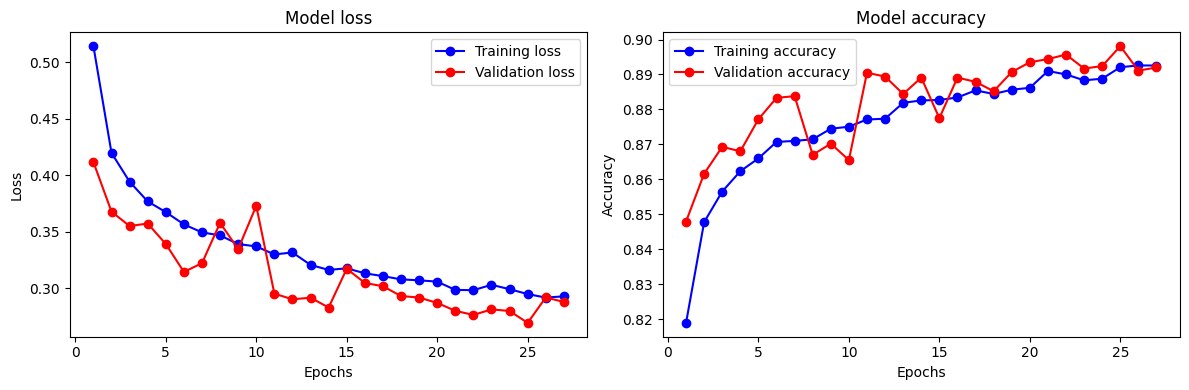

In [19]:
import matplotlib.pyplot as plt

def show_accloss(specific_history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    history_dict = specific_history.history
    epochs = range(1, len(history_dict['loss']) + 1)
    
    # Loss
    axs[0].plot(epochs, history_dict['loss'], 'b-o', label='Training loss')
    axs[0].plot(epochs, history_dict['val_loss'], 'r-o', label='Validation loss')
    axs[0].set_title('Model loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    
    #Accuracy
    axs[1].plot(epochs, history_dict['accuracy'], 'b-o', label='Training accuracy')
    axs[1].plot(epochs, history_dict['val_accuracy'], 'r-o', label='Validation accuracy')
    axs[1].set_title('Model accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    
    # Display the plot
    plt.tight_layout()
    plt.show()

show_accloss(history)

In [16]:
results = final_model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 0s 626us/step - loss: 0.4901 - accuracy: 0.8470
[0.4901009798049927, 0.847000002861023]


## Regularization <a class="anchor" id="apartado3"></a>

In [23]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=metric)

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/27
938/938 [==============================] - 3s 3ms/step - loss: 0.6089 - accuracy: 0.7785 - val_loss: 0.4740 - val_accuracy: 0.8286
Epoch 2/27
938/938 [==============================] - 3s 3ms/step - loss: 0.5097 - accuracy: 0.8147 - val_loss: 0.4097 - val_accuracy: 0.8514
Epoch 3/27
938/938 [==============================] - 3s 3ms/step - loss: 0.4946 - accuracy: 0.8191 - val_loss: 0.4056 - val_accuracy: 0.8504
Epoch 4/27
938/938 [==============================] - 3s 3ms/step - loss: 0.4846 - accuracy: 0.8231 - val_loss: 0.3815 - val_accuracy: 0.8592
Epoch 5/27
938/938 [==============================] - 3s 3ms/step - loss: 0.4702 - accuracy: 0.8285 - val_loss: 0.3807 - val_accuracy: 0.8584
Epoch 6/27
938/938 [==============================] - 3s 3ms/step - loss: 0.4638 - accuracy: 0.8289 - val_loss: 0.3664 - val_accuracy: 0.8660
Epoch 7/27
938/938 [==============================] - 3s 3ms/step - loss: 0.4661 - accuracy: 0.8317 - val_loss: 0.3546 - val_accuracy: 0.8658
Epoch 

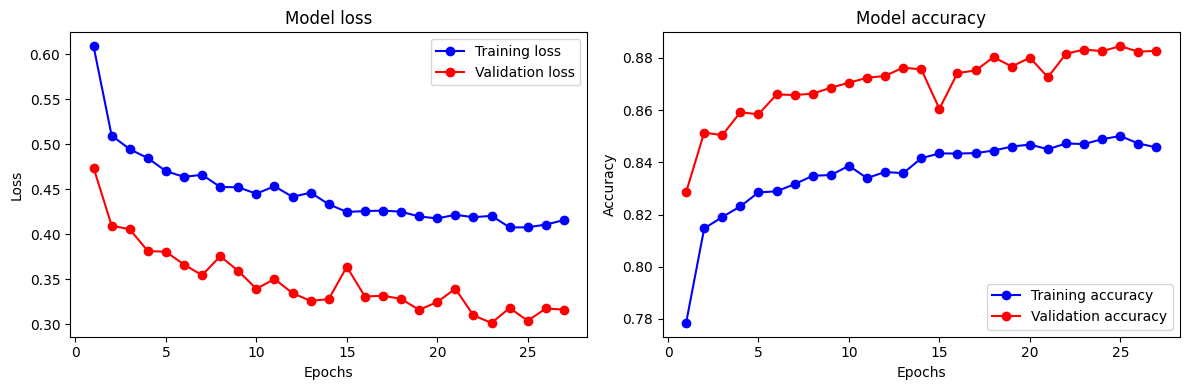

In [24]:
show_accloss(history)

In [25]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 0s 467us/step - loss: 0.4639 - accuracy: 0.8551
[0.46386751532554626, 0.8550999760627747]


In [29]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=metric)

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/27
938/938 [==============================] - 2s 2ms/step - loss: 0.5486 - accuracy: 0.8043 - val_loss: 0.4280 - val_accuracy: 0.8468
Epoch 2/27
938/938 [==============================] - 2s 2ms/step - loss: 0.4702 - accuracy: 0.8326 - val_loss: 0.4137 - val_accuracy: 0.8514
Epoch 3/27
938/938 [==============================] - 2s 2ms/step - loss: 0.4414 - accuracy: 0.8421 - val_loss: 0.3650 - val_accuracy: 0.8675
Epoch 4/27
938/938 [==============================] - 2s 3ms/step - loss: 0.4228 - accuracy: 0.8468 - val_loss: 0.3934 - val_accuracy: 0.8511
Epoch 5/27
938/938 [==============================] - 3s 3ms/step - loss: 0.4098 - accuracy: 0.8512 - val_loss: 0.3743 - val_accuracy: 0.8629
Epoch 6/27
938/938 [==============================] - 2s 2ms/step - loss: 0.4033 - accuracy: 0.8551 - val_loss: 0.3555 - val_accuracy: 0.8720
Epoch 7/27
938/938 [==============================] - 2s 2ms/step - loss: 0.3940 - accuracy: 0.8562 - val_loss: 0.3504 - val_accuracy: 0.8730
Epoch 

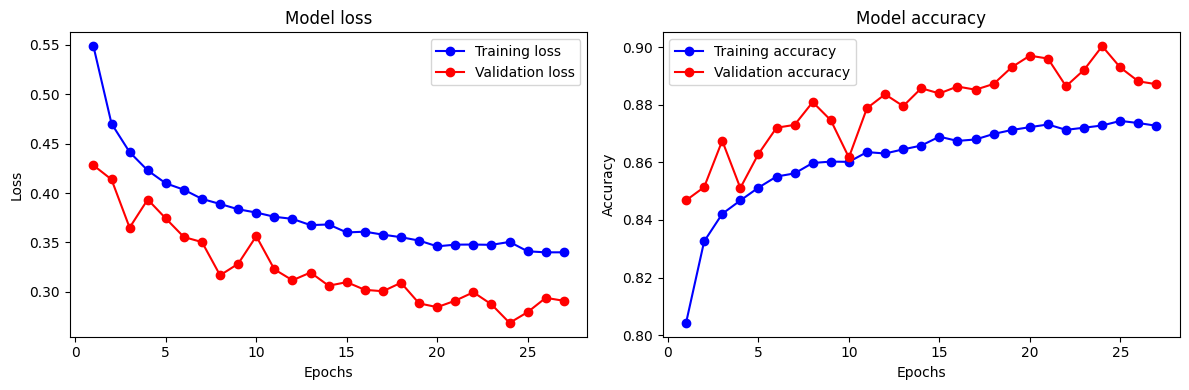

In [30]:
show_accloss(history)

In [31]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 0s 737us/step - loss: 0.3923 - accuracy: 0.8574
[0.3922743797302246, 0.8574000000953674]


In [36]:
from tensorflow.keras import regularizers

model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=metric)

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/27
938/938 [==============================] - 4s 4ms/step - loss: 1.5618 - accuracy: 0.7410 - val_loss: 1.7283 - val_accuracy: 0.6737
Epoch 2/27
938/938 [==============================] - 3s 4ms/step - loss: 1.3318 - accuracy: 0.7527 - val_loss: 1.4236 - val_accuracy: 0.6942
Epoch 3/27
938/938 [==============================] - 4s 4ms/step - loss: 1.2200 - accuracy: 0.7535 - val_loss: 1.4484 - val_accuracy: 0.7128
Epoch 4/27
938/938 [==============================] - 4s 4ms/step - loss: 1.1060 - accuracy: 0.7561 - val_loss: 1.3428 - val_accuracy: 0.7449
Epoch 5/27
938/938 [==============================] - 4s 4ms/step - loss: 1.0849 - accuracy: 0.7577 - val_loss: 1.2994 - val_accuracy: 0.6965
Epoch 6/27
938/938 [==============================] - 3s 4ms/step - loss: 1.0588 - accuracy: 0.7568 - val_loss: 1.0069 - val_accuracy: 0.7610
Epoch 7/27
938/938 [==============================] - 3s 4ms/step - loss: 1.0533 - accuracy: 0.7606 - val_loss: 1.1544 - val_accuracy: 0.7480
Epoch 

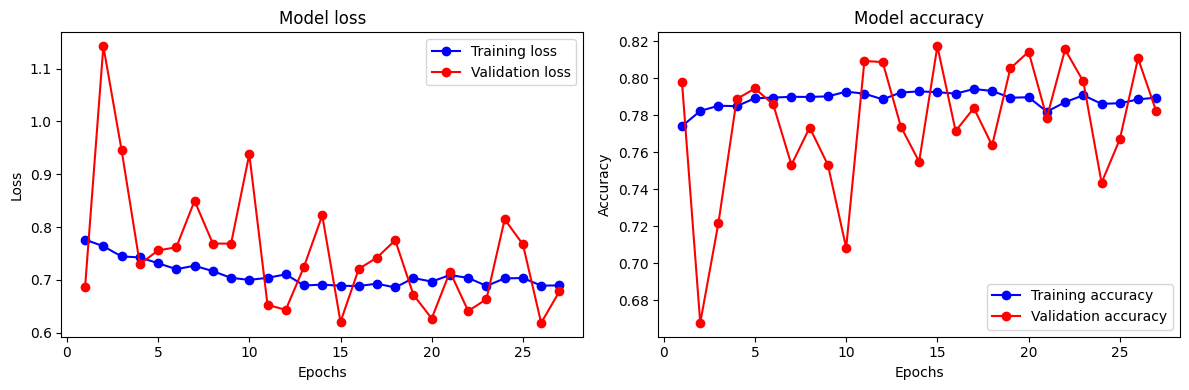

In [34]:
show_accloss(history)

In [35]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.7702
[0.7103300094604492, 0.7702000141143799]


## Results <a class="anchor" id="apartado4"></a>

## Conclusions <a class="anchor" id="apartado5"></a>